In [330]:
#vineethreddy nalla
#vineethreddynalla1@gmail.com

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
#load the dataset
data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\datasets\Screening\screening_exercise_orders_v201810.csv')

In [333]:
#first five rows in the dataset
data.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,1/1/2017 0:11,198.5,1
1,1001,0,1/1/2017 0:29,338.0,1
2,1002,1,1/1/2017 1:30,733.0,1
3,1003,1,1/1/2017 1:34,772.0,1
4,1004,0,1/1/2017 3:11,508.0,1


In [334]:
#checkin the multiple rows for customer_id 1002
data[data['customer_id'] == 1002]

,customer_id,gender,date,value,predicted_gender
2,1002,1,1/1/2017 1:30,733.0,1
928,1002,1,1/23/2017 4:33,148.6,1
1742,1002,1,2/19/2017 21:35,176.0,1


In [335]:
#converting the date column from object to datetime column
data['date'] = pd.to_datetime(data['date'])

In [336]:
#checking the datatypes of each column in the dataset
data.dtypes

customer_id                  int64
gender                       int64
date                datetime64[ns]
value                      float64
predicted_gender             int64
dtype: object

In [337]:
# Assemble a dataframe with one row per customer and the following columns:
# customer_id
# gender
# most_recent_order_date
# order_count (number of orders placed by this customer) Sort the dataframe by customer_id ascending 
#and display the first 10 rows.

# Answer: There were rows which were multiple transactions (orders) done by customer with different time stamps. 
# They had to be grouped by customer_id, order_count columns contains number of orders done and most_recent_order_date i.e.recent transaction time stamp of order is taken. 
# The dataframe is sorted in ascending order and only first 10 rows are displayed in this notebook.

In [338]:
data.groupby('customer_id')['value'].count()

customer_id
1000    1
1001    1
1002    3
1003    4
1004    1
       ..
9809    1
9810    1
9811    1
9812    1
9813    1
Name: value, Length: 8814, dtype: int64

In [339]:
#creating a new column for the orders made by each customer and storing the counts of the orders in the new column named order_count 
data['order_count'] = data.groupby('customer_id')['value'].transform('count')

In [340]:
data.head()
#clearly we can see a new column created for the order counts

,customer_id,gender,date,value,predicted_gender,order_count
0,1000,0,2017-01-01 00:11:00,198.5,1,1
1,1001,0,2017-01-01 00:29:00,338.0,1,1
2,1002,1,2017-01-01 01:30:00,733.0,1,3
3,1003,1,2017-01-01 01:34:00,772.0,1,4
4,1004,0,2017-01-01 03:11:00,508.0,1,1


In [341]:
#creating the new column for the most recent purchase made by the each customer in the year 2017 and storing the recent date in the new column named recent_date
data['recent_date'] = data.groupby('customer_id')['date'].transform('max')

In [342]:
data.head()
#clearly we can see new column is been created and most recent purchase of each customer is stored in the recent_date column

,customer_id,gender,date,value,predicted_gender,order_count,recent_date
0,1000,0,2017-01-01 00:11:00,198.5,1,1,2017-01-01 00:11:00
1,1001,0,2017-01-01 00:29:00,338.0,1,1,2017-01-01 00:29:00
2,1002,1,2017-01-01 01:30:00,733.0,1,3,2017-02-19 21:35:00
3,1003,1,2017-01-01 01:34:00,772.0,1,4,2017-04-26 02:37:00
4,1004,0,2017-01-01 03:11:00,508.0,1,1,2017-01-01 03:11:00


In [343]:
#creating a new dataframe with the columns mentioned in the question i.e 'customer_id','gender','recent_date','order_count'
data1 = data[['customer_id','gender','recent_date','order_count']]

In [344]:
#sorting the dataframe by customer_id in ascending order
dat1 = data1.sort_values(by='customer_id')

In [345]:
#drop off duplicates so that each customer has one row
data2 = data1.drop_duplicates()

In [346]:
#select the first 10 rows of customer order count
top10customerordercount = data2.head(10)

In [347]:
top10customerordercount

,customer_id,gender,recent_date,order_count
0,1000,0,2017-01-01 00:11:00,1
1,1001,0,2017-01-01 00:29:00,1
2,1002,1,2017-02-19 21:35:00,3
3,1003,1,2017-04-26 02:37:00,4
4,1004,0,2017-01-01 03:11:00,1
5,1005,1,2017-12-16 01:39:00,2
6,1006,1,2017-05-09 15:27:00,3
7,1007,0,2017-01-01 15:59:00,1
8,1008,0,2017-12-17 05:47:00,3
9,1009,1,2017-01-01 19:27:00,1


In [348]:
#question 2
# Plot the count of orders per week for the store.
# Answer: There are 52 weeks in a year. Thus, data[date] is mutated by week number. 
#The orders are summarized count and a line plot (visually appealing) is created

In [349]:
data

,customer_id,gender,date,value,predicted_gender,order_count,recent_date
0,1000,0,2017-01-01 00:11:00,198.50,1,1,2017-01-01 00:11:00
1,1001,0,2017-01-01 00:29:00,338.00,1,1,2017-01-01 00:29:00
2,1002,1,2017-01-01 01:30:00,733.00,1,3,2017-02-19 21:35:00
3,1003,1,2017-01-01 01:34:00,772.00,1,4,2017-04-26 02:37:00
4,1004,0,2017-01-01 03:11:00,508.00,1,1,2017-01-01 03:11:00
...,...,...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:00,794.44,0,1,2017-12-31 22:16:00
13467,9811,1,2017-12-31 22:24:00,148.60,0,1,2017-12-31 22:24:00
13468,9812,0,2017-12-31 23:01:00,153.00,1,1,2017-12-31 23:01:00
13469,9813,0,2017-12-31 23:11:00,534.00,1,1,2017-12-31 23:11:00


In [350]:
#aggregating the orders weekly
ordersperweek = data.groupby(data.date.dt.week).size()

In [351]:
#clearly we can see the no of orders in first five weeks
ordersperweek.head()

date
1    180
2    264
3    405
4    233
5    211
dtype: int64

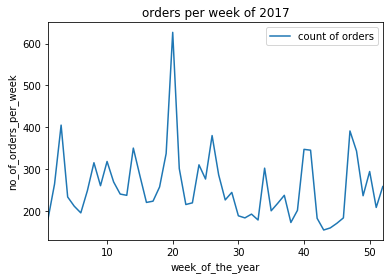

In [352]:
#plotting line graph to see how the orders are being varied weekly.
ax = ordersperweek.plot(label = 'count of orders')
ax.set_xlabel('week_of_the_year')
ax.set_ylabel('no_of_orders_per_week')
ax.set_title('orders per week of 2017')
plt.legend()
plt.show()
#from the below graph we can see that highest no of orders are in the week 20 and lowest no of orders are in the week 43
#on the whole the graph is a roller coaster

In [353]:
#Question 3
# Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

#null hypothesis : mean Difference between gender0 and gender1 is not significant
#Alternative hypothesis : mean difference between gender0 and gender1 is significant

# Answer: The mean order values for gender=0 and gender=1 are 363.89 & 350.70 respectively.
# To see if the difference is significant, I have performed t-testing/null hypothesis to check for p-value with 95% confidence.
# Meaning alpha(threshold) = 0.05. We can see from the results that p-value = 0.04816 lesser than 0.05 i.e. threshold value. 
# Therefore, with 95% confidence I can reject this null hypothesis meaning, the difference is not significant

In [354]:
#checking the data for gender0
gender0 = data[data['gender']==0]

In [355]:
#first five rows of gender0
gender0.head()

,customer_id,gender,date,value,predicted_gender,order_count,recent_date
0,1000,0,2017-01-01 00:11:00,198.50,1,1,2017-01-01 00:11:00
1,1001,0,2017-01-01 00:29:00,338.00,1,1,2017-01-01 00:29:00
4,1004,0,2017-01-01 03:11:00,508.00,1,1,2017-01-01 03:11:00
7,1007,0,2017-01-01 15:59:00,168.00,0,1,2017-01-01 15:59:00
8,1008,0,2017-01-01 18:01:00,207.99,0,3,2017-12-17 05:47:00


In [356]:
#mean value for the gender0
gender0['value'].mean()

363.89000591803506

In [357]:
#variance for the gender0
gender0['value'].var()

157238.590727078

In [358]:
#checking the data for the gender1
gender1 = data[data['gender']==1]

In [359]:
#first five rows for the gender1
gender1.head()

,customer_id,gender,date,value,predicted_gender,order_count,recent_date
2,1002,1,2017-01-01 01:30:00,733.00,1,3,2017-02-19 21:35:00
3,1003,1,2017-01-01 01:34:00,772.00,1,4,2017-04-26 02:37:00
5,1005,1,2017-01-01 10:08:00,338.00,0,2,2017-12-16 01:39:00
6,1006,1,2017-01-01 15:42:00,1526.43,1,3,2017-05-09 15:27:00
9,1009,1,2017-01-01 19:27:00,283.00,1,1,2017-01-01 19:27:00


In [360]:
#mean value for the gender1
gender1['value'].mean()

350.70836114422

In [361]:
#varinace for the gender1
gender1['value'].var()

142509.8268249081

In [362]:
from scipy import stats

In [363]:
#applying the welch's t_test because there is difference in variance
stats.ttest_ind(gender0['value'], gender1['value'], equal_var = False)

Ttest_indResult(statistic=1.976107933576866, pvalue=0.04816296295128402)

In [364]:
#from the above results we see that pvalue is 0.048 which is less than threshold value(alpha) 0.05 so we reject the null hypothesis.

In [365]:
# Results 
##  Welch Two Sample t-test
## 
## data:  gender0['value'] and gender1['value]
## t = 1.9761, p-value = 0.04816
## alternative hypothesis: true difference in means is not equal to 0
## sample estimates:
## mean of gender0 mean of gender1 
##  363.8900        350.7084

In [366]:
data

,customer_id,gender,date,value,predicted_gender,order_count,recent_date
0,1000,0,2017-01-01 00:11:00,198.50,1,1,2017-01-01 00:11:00
1,1001,0,2017-01-01 00:29:00,338.00,1,1,2017-01-01 00:29:00
2,1002,1,2017-01-01 01:30:00,733.00,1,3,2017-02-19 21:35:00
3,1003,1,2017-01-01 01:34:00,772.00,1,4,2017-04-26 02:37:00
4,1004,0,2017-01-01 03:11:00,508.00,1,1,2017-01-01 03:11:00
...,...,...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:00,794.44,0,1,2017-12-31 22:16:00
13467,9811,1,2017-12-31 22:24:00,148.60,0,1,2017-12-31 22:24:00
13468,9812,0,2017-12-31 23:01:00,153.00,1,1,2017-12-31 23:01:00
13469,9813,0,2017-12-31 23:11:00,534.00,1,1,2017-12-31 23:11:00


In [367]:
#question 4
#Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

#from sklearn import confusion matrix
from sklearn.metrics import confusion_matrix

In [368]:
confusion_matrix(data['gender'], data['predicted_gender'])

array([[3349, 3410],
       [1463, 5249]], dtype=int64)

In [369]:
#from the above confusion matrix 
#true positives = 5249 
#false positives = 3410
#true negatives = 3349
#false negatives = 1463
#comparitive to true positives and true negatives false positives is relatively high which is causing Type-1 error in the model
#Such a model with high false positive rates can be problematic in the long run, so the parameters of the model should be changed to decrease the fp rate.
#The model otherwise will make a lot of Type-1 error.

In [370]:
#from classification report we can see precision, recall and f1-score of the model
from sklearn.metrics import classification_report
print(classification_report(data['gender'], data['predicted_gender']))
#precision is in general true positives i.e percentage of your results which are relevant, which is given by TP/TP+FP
#recall refers to the percentage of total relevant results correctly classified by your algorithm, which is given by TP/TP+FN
#f1 score is the harmonic mean of precision and recall, which is given by 2*((precision*recall)/(precision+recall))
#from the results what we can say is that for the gender 0 the precision is 0.70 that means 70% are correct or relevant
#similarly for the gender 1 the precision is 0.61 that means 61% are relevant or correct.
#recall is 50% for gender 0 that means the algorithm correctly classified only 50%
#similarly for the gender 1 the recall is 78% that means the algorithm correctly classified is 78%

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



In [371]:
#accuracy is basically how much correct we are in predicting the results.
from sklearn.metrics import accuracy_score
score =accuracy_score(data['gender'], data['predicted_gender'])
score*100
#clearly we can see accuracy is 63.82%, it is basically given by Accuracy: TP+TN/(TP+FP+FN+TN)
# from accuracy we can say that we have predicted 63% correctly

63.825996585257215

In [372]:
#According to the question I have also understood in another way I would like to give the results for that approach too.

In [373]:
#question 4
#"Assuming a single gender prediction was made for each customer",generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?
#from this quoted satement I also have this kind of approach in my mind. Please consider two approaches and evaluate.

In [374]:
#Assuming a single gender predictions for each customer means i was thinking only one gender is made for all customers, so i created a new column named single_gender_prediction and named it 1 
data['single_gender_prediction'] = 1

In [375]:
data.head()
#so here single_gender_prediction is 1 for all customers

,customer_id,gender,date,value,predicted_gender,order_count,recent_date,single_gender_prediction
0,1000,0,2017-01-01 00:11:00,198.5,1,1,2017-01-01 00:11:00,1
1,1001,0,2017-01-01 00:29:00,338.0,1,1,2017-01-01 00:29:00,1
2,1002,1,2017-01-01 01:30:00,733.0,1,3,2017-02-19 21:35:00,1
3,1003,1,2017-01-01 01:34:00,772.0,1,4,2017-04-26 02:37:00,1
4,1004,0,2017-01-01 03:11:00,508.0,1,1,2017-01-01 03:11:00,1


In [376]:
#create a confusion matrix 
confusion_matrix(data['gender'], data['single_gender_prediction'])

array([[   0, 6759],
       [   0, 6712]], dtype=int64)

In [377]:
#from the above confusion matrix 
#true positives = 6712 
#false positives = 6759
#true negatives = 0
#false negatives = 0
#again it has high false positive rates which is type-1 error in the model, such a high false positives whill cause a problem in future.

In [378]:
#from classification report we can see precision, recall and f1-score of the model
from sklearn.metrics import classification_report
print(classification_report(data['gender'], data['single_gender_prediction']))
 #Precision: TP/(TP+FP) = Accuracy = 0.4982 (49.82% precise model) Recall: TP/(TP+FN) = 6712/6712 = 1
#The quality of prediction is 50% accurate due to gender column values are not left or right skewed. 
#Meaning equal number of gender = 0 and gender = 1 values are present. 
#We can also notice that recall = 1 meaning our precision of classifying genders is less and is biased to capturing only gender = 1 customers. 
#We captured all gender = 1 customers but also missed out a lot on capturing gender = 0 customers

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6759
           1       0.50      1.00      0.67      6712

    accuracy                           0.50     13471
   macro avg       0.25      0.50      0.33     13471
weighted avg       0.25      0.50      0.33     13471



In [379]:
#accuracy is basically how much correct we are in predicting the results.
from sklearn.metrics import accuracy_score
score =accuracy_score(data['gender'], data['single_gender_prediction'])
score*100
#clearly we can see accuracy is 49.82%, it is basically given by Accuracy: TP+TN/(TP+FP+FN+TN)
# from accuracy we can say that we have predicted 50% correctly

49.82555118402494

In [380]:
#Question 5

# Describe one of your favorite tools or techniques and give a small example of how it’s helped you solve a problem. 
# Limit your answer to one paragraph.

# Answer: My favorite tool for Data Analysis and problem solving has always been Python. 
# Very easy to perform statistical analysis, modelling, cleaning and visualizing the data. 
# I would like to give an example of how I used Python in Data Lake to give meaning insights to Analytics and Insights team regarding production sales’ and campaigning data (Data Sciene Intern experience at BI).
#I have used sklearn library to apply machine learning algorithms to predict the sales, I have also used various statistical libraries to test the stationarity and non-stationarity in the time series analysis before applying arima_model for predicting the accurate sales before the production.
# Effective text mining with use of regular expressions. Then model creation along with scikit-learn library gave a visualized display of models, ROC, Confusion Matrix etc. 
# It was very easy to expalin the insights to executives and create interest to use this tool

In [381]:
#Thank you so much for giving this beautiful test I have really enjoyed doing this.